In [1]:
knitr::opts_chunk$set(echo = FALSE)
suppressMessages(expr =  {
  if ("xfun" %in% row.names(installed.packages()) == FALSE) {
    install.packages("xfun")
  }

  if ("IRdisplay" %in% row.names(installed.packages()) == TRUE) {
    display_markdown <<- \(x) IRdisplay::display_markdown(as.character(x))
    display_html <<- \(x) IRdisplay::display_html(as.character(x))
  } else {
    display_markdown <<- knitr::asis_output
    display_html <<- knitr::asis_output
  }

xfun::pkg_attach(
    c("tidyverse",
      "polspline",
      "patchwork",
      "magrittr",
      "bayesplay",
      "knitr",
      "bayesplay"),
      install = TRUE)

})

table_format <- "html"


# The Bayes factor

The primary aim of this course is to learn how to compute and interpret Bayes
factors. But what is a Bayes factor? Well it turns out that we've already
computed a Bayes factor. The Bayes factor is just the ratio that we computed in
the previous section. The Bayes factor is a metric that compares the relative
probability of obtaining our data under one model compared to another. 

When we computed these ratios, the Bayes factor, in the previous section, it was
made up of two ingredients. 

1. We had our likelihood that related parameter values to our data. It told
us the relative probability of obtaining our data under different values of the
the parameter (the coin bias)

2. We had priors, which assigned different probabilities to the different values
of the parameter. These served as our hypotheses about the parameter (the coin
bias), and they served as the *weights* for our average of the likelihood. 
We had one prior for each hypothesis.

To perform the computation itself, we multiplied the prior by the likelihood,
and took the weighted average, by taking the integral. Mathematically, we did
the following:

$$\mathcal{M}_H = \int_{\theta\in\Theta_H}\mathcal{L}_H(\theta|\mathbf{y})p(\theta)d\theta$$

We did this for each hypothesis (e.g., $\mathcal{M}_0$ and $\mathcal{M}_1$),
and then took the ratio $\frac{\mathcal{M}_0}{\mathcal{M}_1}$. And this ratio
was the Bayes factor.

$$\mathrm{BF}_{01} = \frac{\mathcal{M}_0}{\mathcal{M_1}}$$

## Computing Bayes factors with `bayesplay`

To actually compute Bayes factors we're going to use an `R` package called 
`bayesplay`. The `bayesplay` package allows you to specify likelihoods and 
priors, and to perform some operations on them. The operations, described above.

Let's step through some `R` to see how we would actually do it:

First, we specify the likelihood. We'll specify a likelihood of the **binomial**
family. It requires 2 inputs. The number of heads, and the number of flips.

In [2]:
#| include: TRUE
#| echo: TRUE
data_model <- likelihood(family = "binomial", successes = 8, trials = 10)

Second, we'll specify the two priors. For the first, we'll set a **point** prior
at 0.5 to represent our fair coin hypothesis.

In [3]:
#| include: TRUE
#| echo: TRUE
fair_coin <- prior(family = "point", point = 0.5)

Next, we'll use a **uniform** prior to represent equal weights for all values 
between 0 and 1. There's two ways we can do this. First, we can use the 
**uniform** family.

In [4]:
#| include: TRUE
#| echo: TRUE
unfair_coin <- prior(family = "uniform", min = 0, max = 1)

But we can also use the **beta** family. The result will be the same in either
case.

In [5]:
#| include: TRUE
#| echo: TRUE
unfair_coin <- prior(family = "beta", alpha = 1, beta = 1)

Since we've been visualizing everything so far, we can also visualise the 
likelihood and priors we've just defined. To do this, we just use the `plot()`
function.


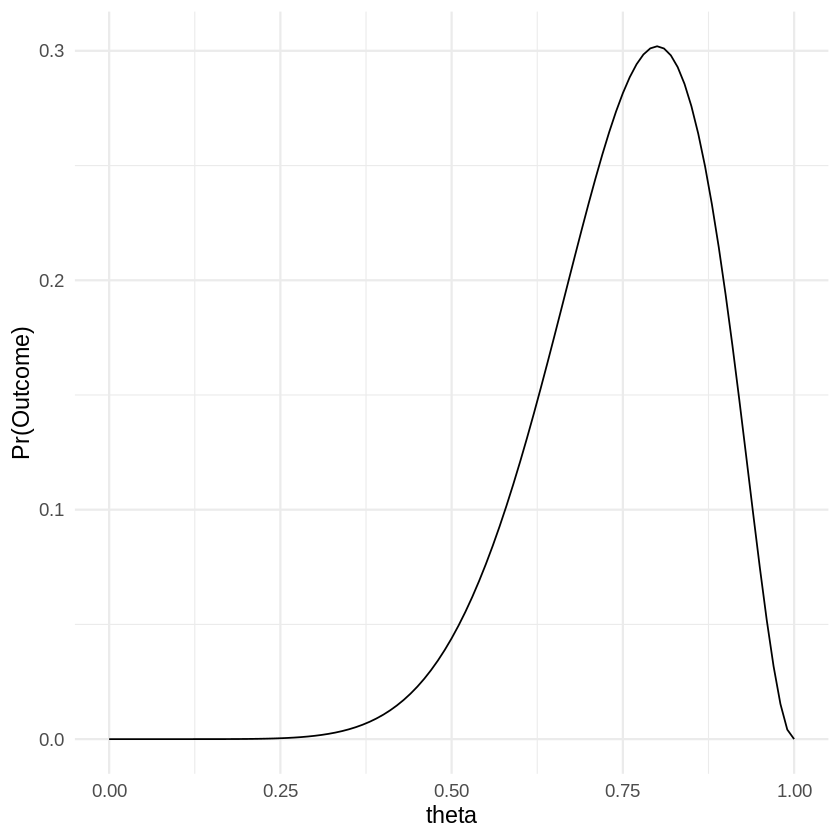

In [6]:
#| include: TRUE
#| echo: TRUE
plot(data_model) +
  theme_minimal(14)

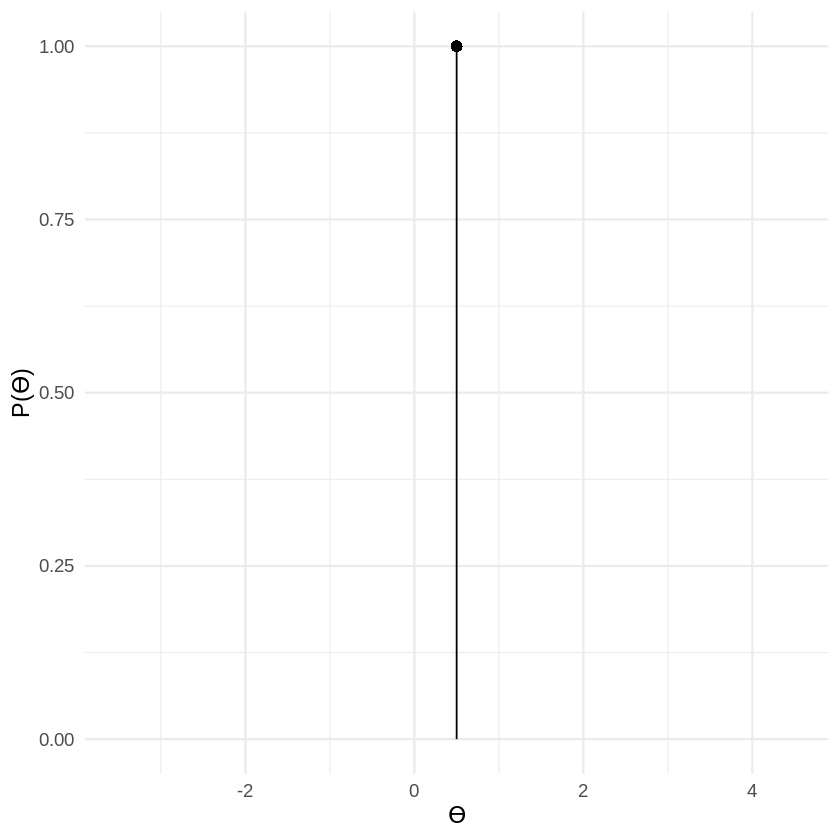

In [7]:
#| include: TRUE
#| echo: TRUE
plot(fair_coin) +
  theme_minimal(14)

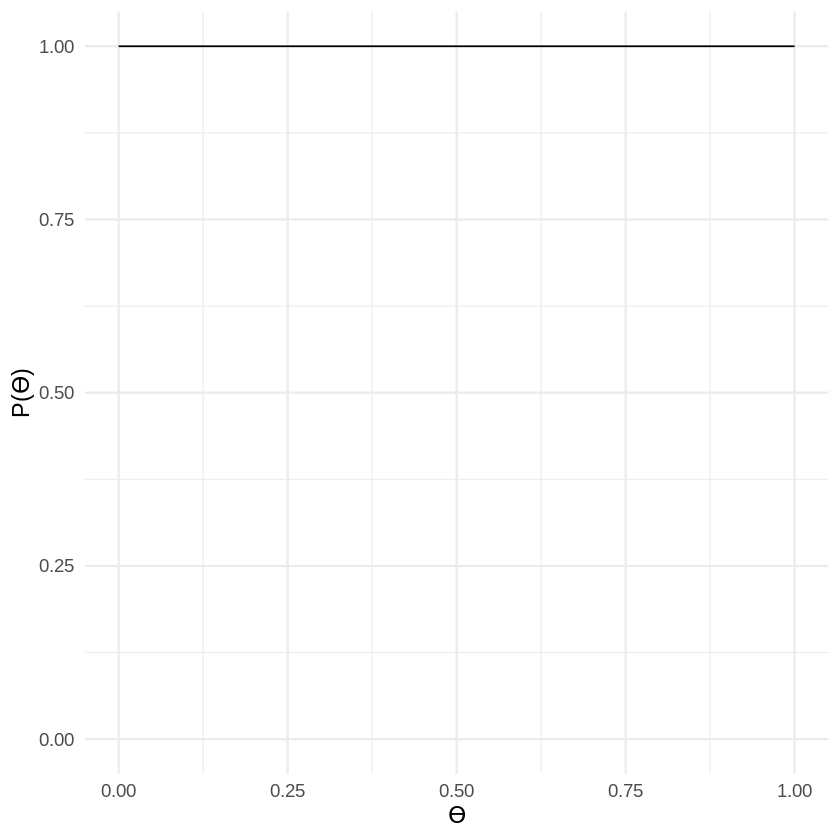

In [8]:
#| include: TRUE
#| echo: TRUE
plot(unfair_coin) +
  theme_minimal(14)

The next step was to multiply the likelihood by the prior. We'll do this for
our likelihood and each of the prior.

In [9]:
#| include: TRUE
#| echo: TRUE
m0 <- data_model * fair_coin
m1 <- data_model * unfair_coin

Plotting these isn't super informative, but we can do it anyway.

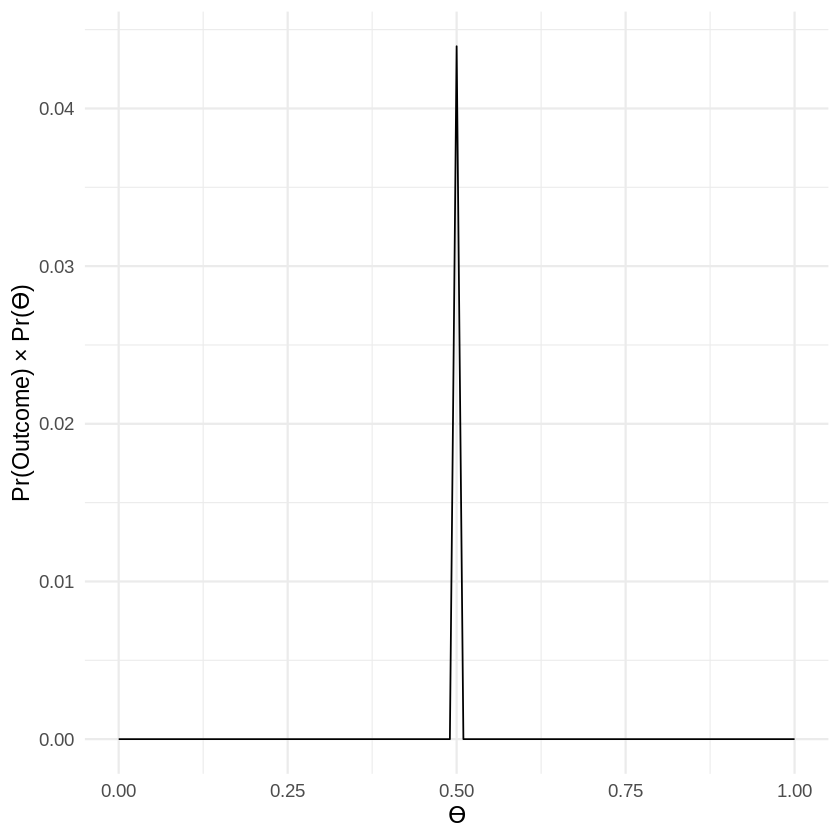

In [10]:
#| include: TRUE
#| echo: TRUE
plot(m0) +
  theme_minimal(14)

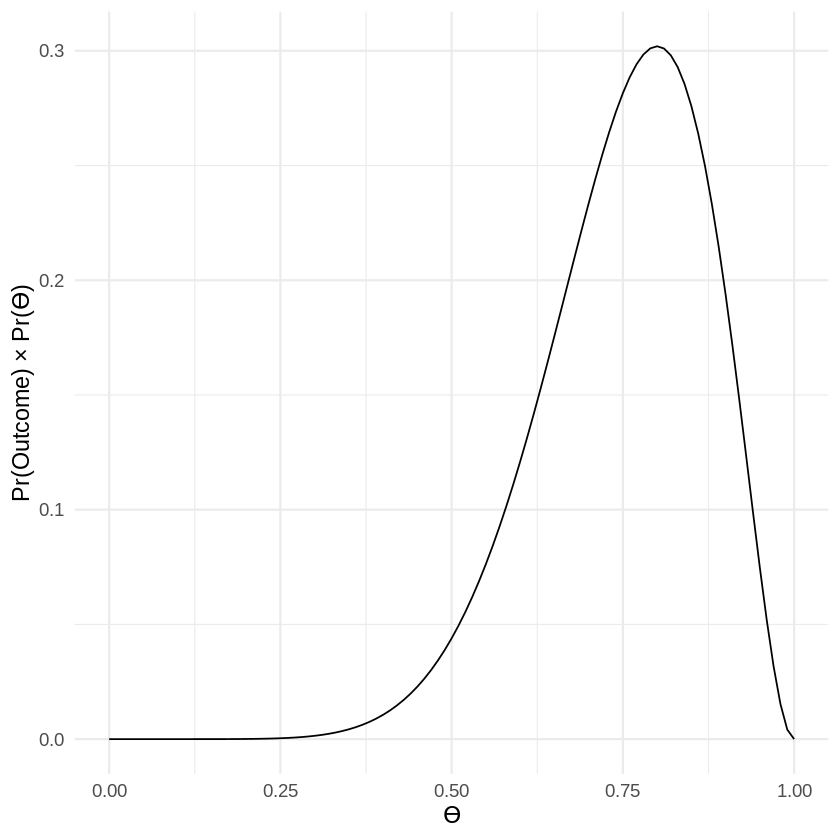

In [11]:
#| include: TRUE
#| echo: TRUE
plot(m1) +
  theme_minimal(14)

The next step is to work our the area under each of these curves. That is, work 
out that integral. To do this, we just use the `integral()` function.

In [12]:
#| include: TRUE
#| echo: TRUE
int_m0 <- integral(m0)
int_m1 <- integral(m1)

And finally, we just take the ratio of these two values to get the Bayes factor.

In [13]:
#| include: TRUE
#| echo: TRUE
bf <- int_m1 / int_m0

In [14]:
glue::glue("The bayes factor is {round(bf,3)}") %>%
  display_markdown()

The bayes factor is 2.069

And that's all there is to it. 

However, we can do a little more. In the previous section we saw plots that showed
the predictions of each model and highlighted our specific observation. We can
also generate these easily with `bayesplay`. We simply use the `visual_compare()`
function, and give the two models (the likelihood $\times$ the prior) as inputs.

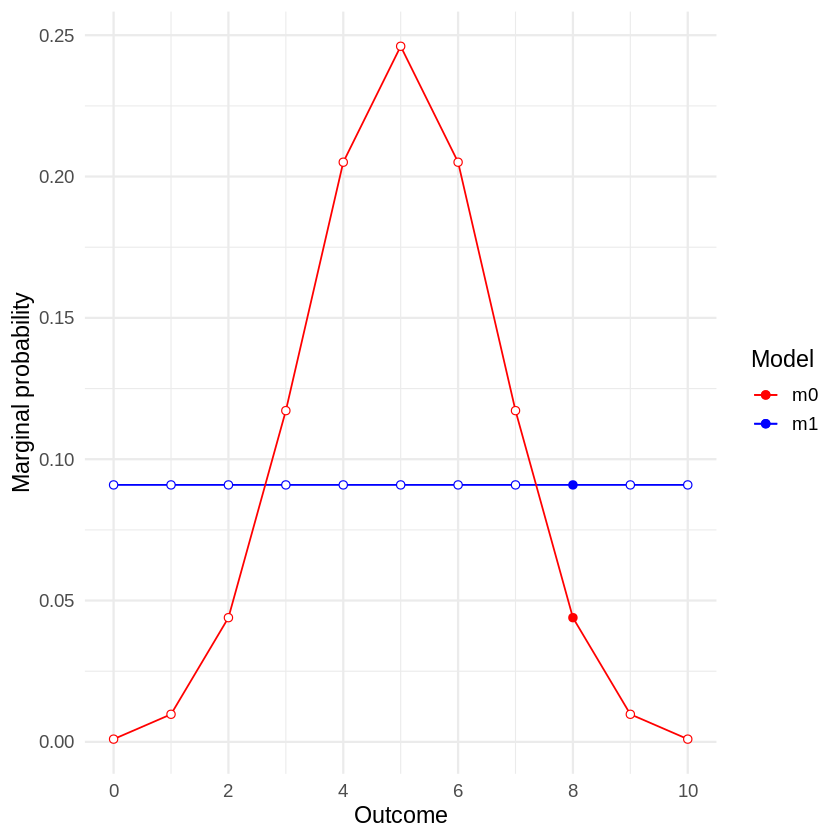

In [15]:
#| include: TRUE
#| echo: TRUE

visual_compare(m1, m0) +
  theme_minimal(14)

## Computing Bayes factors with Bayesplay-Web

If you're not super proficient with `R`, then you can use the **Bayesplay-Web**
app to compute Bayes factors. The **Bayesplay-Web** will even generate the `R`
code for you. To access the web-app go to
[bayesplay.mindsci.net](https://bayesplay.mindsci.net).

Below is an image of the **Bayesplay-Web** interface. 

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/bayesplay_interface.png)

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/define_likelihood.png)

Then we define the prior for unfair coin.

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/alt_prior.png)

And then the prior for the fair coin.

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/null_prior.png)

And then we click **Calculate** to get our answer.

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/calculate.png)

The BF10 value shows the evidence for the alternative model over the null
model. The BF01 value is the inverse, and shows the evidence for the null model
over the alternative model"

Toggling the **Show R Code** button will show you the `R` code you need to compute
the model.

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/show_rcode.png)

And finally, clicking on **View advanced output** will take you to a new screen
where you can view some additional output including the model predictions. 

![](https://raw.githubusercontent.com/ljcolling/bayes2022/main/_site/model_predictions.png)

## Moving beyond coin flips

In the next section, we'll learn how to calculate Bayes factors with different 
kinds of likelihoods for different kinds of data that we might encounter. We'll
also go in to more detail about different kinds of priors we might want to use
and why we might want to use them.

In the meantime, you can play around with the **web-app** and have a look
through the documentation for the `R` package (available at
[bayesplay.github.io/bayesplay/](https://bayesplay.github.io/bayesplay/)).
You'll have to submit `R` code for the assessment (either written yourself or
generated with the web-app) so it pays to familiarise yourself with it. 



